In [1]:
from Lens_Search import QSOFluxProcessor
from astropy.io import fits


import os
import json
import numpy as np
import fitsio


In [2]:
# Define the path to the FITS file you want to open
fits_file_path = os.path.join(os.path.expandvars('$SCRATCH/Pipeline'), 'Test_Phase2_Objects.fits')

# Open the FITS file
with fits.open(fits_file_path) as hdul:
    # Print the HDU (Header/Data Unit) list
    hdul.info()
    
    # Access the primary HDU
    primary_hdu = hdul[0]
    print("Primary HDU Header:")
    print(primary_hdu.header)
    
    # Access the binary table HDU
    binary_table_hdu = hdul[1]
    data = binary_table_hdu.data

    # Print the column names
    print("\nColumn names in the binary table HDU:")
    print(data.columns.names)
    
    # Access data from columns
    target_ids = data['TARGETID']
    redshifts = data['Z']
    fluxes = data['FLUX']
    labels = data['LABEL']
    elg_fluxes = data['ELG_z']  # Access the ELG flux column
    ename = data['ELG_NAME']
    ivar = data['ivar']

# Output some information about the data
print("\nNumber of entries:", len(data))


Filename: /pscratch/sd/e/edm2158/Pipeline/Test_Phase2_Objects.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     22   3547R x 7C   [K, D, PD(7781), PD(7781), I, D, 20A]   
Primary HDU Header:
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                             

In [3]:
one = np.where(labels == 1)[0]

In [4]:
len(one)

306

In [5]:
#%%time 
results = QSOFluxProcessor.process(fluxes, 2, target_ids, ivar, redshifts, skyline_mask = True)

2025-03-03 13:51:16.380009: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-03 13:51:17.558758: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 37770 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:c3:00.0, compute capability: 8.0
2025-03-03 13:51:23.825768: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8302


 111/1774 [>.............................] - ETA: 2s     

2025-03-03 13:51:26.496048: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


111/111 [==============================] - 0s 2ms/step


In [6]:
lens = np.where(results['Classification'].iloc[one] == 'Lens')

In [7]:
results.iloc[one]

,Name,z_qso,Score,Classification,Predicted Redshift,Fitted Redshift,Redshift Error,Best Chi-Squared,Amp1,Err_Amp1,Mean1,Err_Mean1,Sigma1,Err_Sigma1,Mean2,Err_Mean2,Cont,Err_Cont,SNR
1,39627930178947635,1.469252,0.999996,Lens,1.536732,1.543614,0.000424,7.730499,1.164678,0.464732,9477.506922,1.579478,9483.400000,1.172016,2.878953,1.256891,0.720605,0.033245,2.805920
6,39627930204112764,1.322749,0.999895,Lens,1.593262,1.594471,0.000876,26.694754,1.511888,0.745589,9667.000000,3.265043,9673.000000,2.119951,4.615323,2.452761,1.007423,0.039868,12.746836
24,39627936172608065,1.175041,1.000000,Lens,1.517699,1.527697,0.000324,471.265317,3.383468,0.696321,9418.200000,1.208456,9424.200000,0.779919,4.362176,0.970816,0.890607,0.033260,20.348264
27,39627936176801719,1.533239,1.000000,Lens,1.563583,1.560548,0.000699,inf,1.901865,0.701113,9540.600000,2.605746,9547.181656,1.688744,5.000000,1.987681,0.211041,0.036183,11.660035
35,39627936189388850,1.582232,0.000724,QSO,1.619126,1.603665,0.000332,298.101360,0.677260,0.569915,9701.257533,1.237341,9705.917984,0.951939,0.780021,0.759188,0.527499,0.043120,1.572559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,39628091210862531,0.988225,1.000000,Lens,1.395683,1.416908,0.000172,0.000383,3.303892,0.520325,9005.400000,0.642350,9011.400000,0.451418,3.357338,0.580027,0.791601,0.033127,26.830050
3504,39628091219251541,1.406404,0.998367,Lens,1.423635,1.427099,0.000388,inf,1.475865,0.379075,9043.372210,1.444790,9051.662907,1.080895,3.876857,1.087142,2.382667,0.033234,20.195808
3514,39628091223444567,1.114232,1.000000,Lens,1.252488,1.255821,0.000749,0.009854,1.336267,0.651527,8405.189330,2.791209,8411.478471,1.801538,4.410100,2.332213,1.076586,0.033290,7.208680
3517,39628091227637227,0.974521,1.000000,Lens,1.420233,1.426488,0.001847,7.222142,0.974041,0.954362,9041.095159,6.881562,9045.980089,4.583432,4.227881,4.411705,0.535537,0.033223,12.616274


In [8]:
elg_fluxes[35]

1.5925147168885077

In [9]:
ename[35]

'39627746065778375'

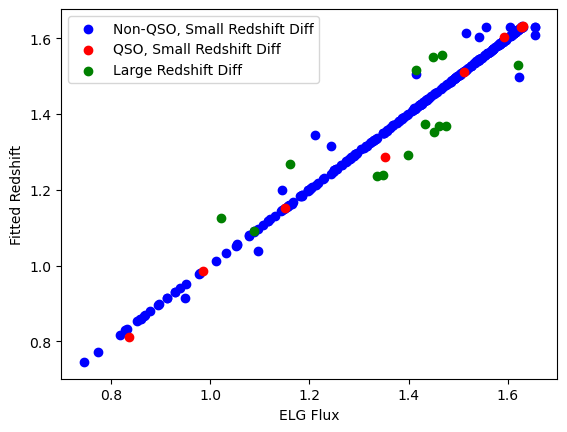

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create a mask for QSO classification
qso_mask = results['Classification'].iloc[one] == 'QSO'

# Create a mask for redshift difference > 0.1
redshift_diff_mask = np.abs(results['Fitted Redshift'].iloc[one] - results['Predicted Redshift'].iloc[one]) > 0.1

# Filter the results where the condition is met
filtered_results = results.iloc[one][redshift_diff_mask]

# Plot all points
plt.scatter(elg_fluxes[one][~qso_mask & ~redshift_diff_mask], 
            results.iloc[one]['Fitted Redshift'][~qso_mask & ~redshift_diff_mask], 
            color='blue', label='Non-QSO, Small Redshift Diff')

# Plot QSO points
plt.scatter(elg_fluxes[one][qso_mask & ~redshift_diff_mask], 
            results.iloc[one]['Fitted Redshift'][qso_mask & ~redshift_diff_mask], 
            color='red', label='QSO, Small Redshift Diff')

# Plot points where redshift difference > 0.1
plt.scatter(elg_fluxes[one][redshift_diff_mask], 
            results.iloc[one]['Fitted Redshift'][redshift_diff_mask], 
            color='green', label='Large Redshift Diff')

# Labels and legend
plt.xlabel("ELG Flux")
plt.ylabel("Fitted Redshift")
plt.legend()
plt.show()


In [12]:
red_fit = results.iloc[one]['Fitted Redshift']
prred = results.iloc[one]['Predicted Redshift']
SNR = results.iloc[one]['SNR']

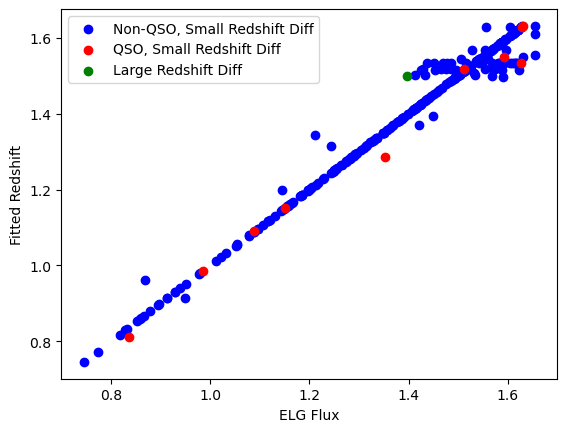

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Create a mask for QSO classification
qso_mask = results['Classification'].iloc[one] == 'QSO'

# Create a mask for redshift difference > 0.1
redshift_diff_mask = np.abs(results['Fitted Redshift'].iloc[one] - results['Predicted Redshift'].iloc[one]) > 0.1

# Filter the results where the condition is met
filtered_results = results.iloc[one][redshift_diff_mask]

# Plot all points
plt.scatter(elg_fluxes[one][~qso_mask & ~redshift_diff_mask], 
            results.iloc[one]['Fitted Redshift'][~qso_mask & ~redshift_diff_mask], 
            color='blue', label='Non-QSO, Small Redshift Diff')

# Plot QSO points
plt.scatter(elg_fluxes[one][qso_mask & ~redshift_diff_mask], 
            results.iloc[one]['Fitted Redshift'][qso_mask & ~redshift_diff_mask], 
            color='red', label='QSO, Small Redshift Diff')

# Plot points where redshift difference > 0.1
plt.scatter(elg_fluxes[one][redshift_diff_mask], 
            results.iloc[one]['Fitted Redshift'][redshift_diff_mask], 
            color='green', label='Large Redshift Diff')

# Labels and legend
plt.xlabel("ELG Flux")
plt.ylabel("Fitted Redshift")
plt.legend()
plt.show()


In [13]:
#np.savez('Phase_2_Machine', red_fit=red_fit, SNR=SNR, true=elg_fluxes[one])
#np.savez('Phase_2_Machine_nofit', red_fit=results.iloc[one]['Predicted Redshift'], SNR=SNR, true=elg_fluxes[one])

np.savez('Phase_2_Machine_mask', red_fit=red_fit, SNR=SNR, true=elg_fluxes[one])
np.savez('Phase_2_Machine_nofit_mask', red_fit=results.iloc[one]['Predicted Redshift'], SNR=SNR, true=elg_fluxes[one])

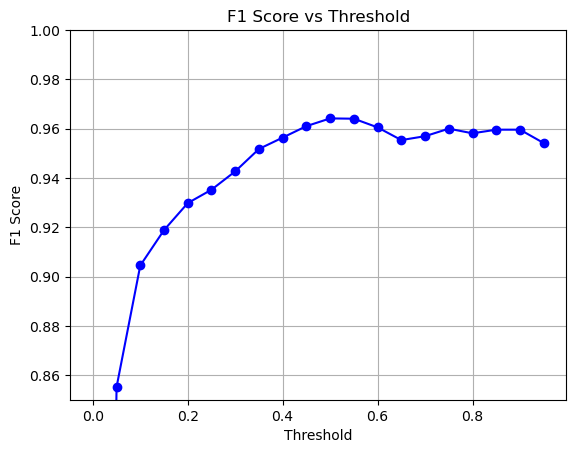

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Assuming `y_true` is the ground truth labels and `y_pred_prob` is the predicted probabilities from your model.
y_true = labels  # Replace with your true labels
y_pred_prob = results['Score']  # Replace with predicted probabilities (output of the model)

# Define the threshold range you want to test
thresholds = np.arange(0, 1, 0.05)

# Store the F1 scores for each threshold
f1_scores = []

# Loop through each threshold
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_pred_prob >= threshold).astype(int)
    
    # Calculate F1 score
    f1 = f1_score(y_true, y_pred)
    
    # Append the F1 score to the list
    f1_scores.append(f1)

# Plot the F1 score vs threshold
plt.plot(thresholds, f1_scores, marker='o', color='blue')  # Scale thresholds by 100 to match your plot
plt.ylim(.85,1)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.grid(True)
plt.show()


In [20]:
import numpy as np

np.savez('Phase2_f1_thresh_plot.npz', f1_scores=f1_scores, thresholds=thresholds)


In [19]:
import numpy as np
from sklearn.metrics import f1_score

# Assuming `y_true` is the ground truth labels and `y_pred_prob` is the predicted probabilities from your model.
y_true = labels.copy()  # Replace with your true labels
y_pred_prob = results['Score']  # Replace with predicted probabilities (output of the model)

# ---- Save Original y_true for No Filtering Case ----
y_true_original = labels.copy()  # Keep the original labels without any filtering

# ---- Filter and set labels for objects that are filtered out ----
snr_threshold = 3

# For objects that are filtered out, set their labels to 0
filtered_indices = results['z_qso'] >3
y_true[filtered_indices] = 0

# ---- Create Binary Predictions Based on the Chosen Threshold ----
best_threshold = 0.7  # Choose a threshold (you can choose the one that gives the best F1 score)

# Convert predicted probabilities to binary predictions using the chosen threshold
y_pred_best = (y_pred_prob >= best_threshold).astype(int)

# ---- Calculate F1 score for the filtered case ----
f1_combined_filtered = f1_score(y_true, y_pred_best)

# ---- Calculate F1 score for the unfiltered case (original y_true) ----
f1_combined_unfiltered = f1_score(y_true_original, y_pred_best)

# Print both F1 scores
print(f'F1 Score at Threshold = {best_threshold} with filtering (SNR >= {snr_threshold}): {f1_combined_filtered:.4f}')
print(f'F1 Score at Threshold = {best_threshold} without filtering: {f1_combined_unfiltered:.4f}')
#Pandas dataframe filtering? Do all the cuts at once? :Look at pandas website maybe chatgpt

F1 Score at Threshold = 0.7 with filtering (SNR >= 3): 0.9570
F1 Score at Threshold = 0.7 without filtering: 0.9570


In [8]:
import numpy as np
from sklearn.metrics import f1_score

# Assuming `y_true` is the ground truth labels and `y_pred_prob` is the predicted probabilities from your model.
y_true = labels.copy()  # Replace with your true labels
y_pred_prob = results['Score']  # Replace with predicted probabilities (output of the model)

# ---- Save Original y_true for No Filtering Case ----
y_true_original = labels.copy()  # Keep the original labels without any filtering

# ---- Filter and set labels for objects that are filtered out ----
snr_threshold = 3

# For objects that are filtered out, set their labels to 0
filtered_indices = (results['z_qso'] > results['Fitted Redshift']) & (results['SNR'] > 3)

y_true[filtered_indices] = 0

# ---- Create Binary Predictions Based on the Chosen Threshold ----
best_threshold = 0.7  # Choose a threshold (you can choose the one that gives the best F1 score)

# Convert predicted probabilities to binary predictions using the chosen threshold
y_pred_best = (y_pred_prob >= best_threshold).astype(int)

# ---- Calculate F1 score for the filtered case ----
f1_combined_filtered = f1_score(y_true, y_pred_best)

# ---- Calculate F1 score for the unfiltered case (original y_true) ----
f1_combined_unfiltered = f1_score(y_true_original, y_pred_best)

# Print both F1 scores
print(f'F1 Score at Threshold = {best_threshold} with filtering (SNR >= {snr_threshold}): {f1_combined_filtered:.4f}')
print(f'F1 Score at Threshold = {best_threshold} without filtering: {f1_combined_unfiltered:.4f}')


F1 Score at Threshold = 0.7 with filtering (SNR >= 3): 0.9667
F1 Score at Threshold = 0.7 without filtering: 0.9701


F1 Score at Threshold = 0.7 with filtering (SNR >= 3): 0.9667


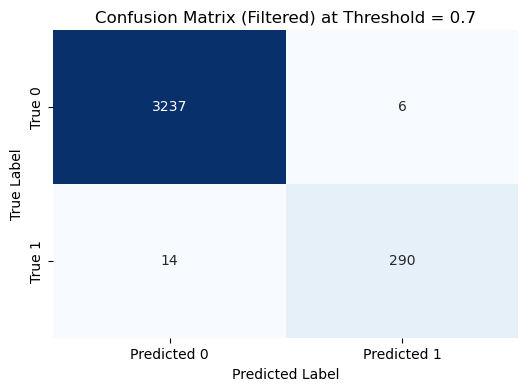

In [9]:
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `y_true` is the ground truth labels and `y_pred_prob` is the predicted probabilities from your model.
y_true = labels.copy()  # Replace with your true labels
y_pred_prob = results['Score']  # Replace with predicted probabilities (output of the model)

# ---- Filter and set labels for objects that are filtered out ----
snr_threshold = 3

# For objects that are filtered out, set their labels to 0
filtered_indices = (results['z_qso'] > results['Fitted Redshift']) & (results['SNR'] > snr_threshold)
y_true[filtered_indices] = 0

# ---- Create Binary Predictions Based on the Chosen Threshold ----
best_threshold = 0.7  # Choose a threshold (you can choose the one that gives the best F1 score)

# Convert predicted probabilities to binary predictions using the chosen threshold
y_pred_best = (y_pred_prob >= best_threshold).astype(int)

# ---- Calculate F1 score for the filtered case ----
f1_combined_filtered = f1_score(y_true, y_pred_best)

# Print the F1 score
print(f'F1 Score at Threshold = {best_threshold} with filtering (SNR >= {snr_threshold}): {f1_combined_filtered:.4f}')

# ---- Confusion Matrix for Filtered Case (After Setting Labels to 0) ----
conf_matrix_filtered = confusion_matrix(y_true, y_pred_best)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_filtered, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['True 0', 'True 1'])
plt.title(f'Confusion Matrix (Filtered) at Threshold = {best_threshold}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


F1 Score at Threshold = 0.7 with filtering (SNR >= 3): 0.9540


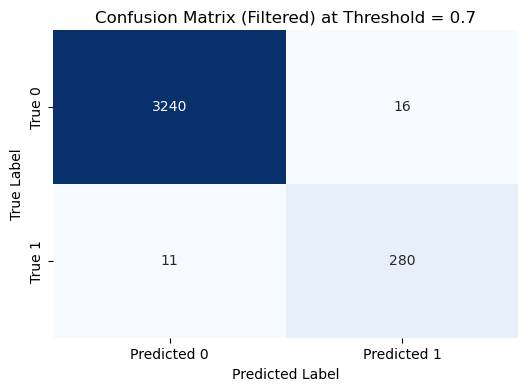

In [10]:
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `y_true` is the ground truth labels and `y_pred_prob` is the predicted probabilities from your model.
y_true = labels.copy()  # Replace with your true labels
y_pred_prob = results['Score']  # Replace with predicted probabilities (output of the model)

# ---- Filter and set labels for objects that are filtered out ----
snr_threshold = 3

# For objects that are filtered out, set their labels to 0
filtered_indices = (results['z_qso'] > results['Fitted Redshift'])
y_true[filtered_indices] = 0

# ---- Create Binary Predictions Based on the Chosen Threshold ----
best_threshold = 0.7  # Choose a threshold (you can choose the one that gives the best F1 score)

# Convert predicted probabilities to binary predictions using the chosen threshold
y_pred_best = (y_pred_prob >= best_threshold).astype(int)

# ---- Calculate F1 score for the filtered case ----
f1_combined_filtered = f1_score(y_true, y_pred_best)

# Print the F1 score
print(f'F1 Score at Threshold = {best_threshold} with filtering (SNR >= {snr_threshold}): {f1_combined_filtered:.4f}')

# ---- Confusion Matrix for Filtered Case (After Setting Labels to 0) ----
conf_matrix_filtered = confusion_matrix(y_true, y_pred_best)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_filtered, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['True 0', 'True 1'])
plt.title(f'Confusion Matrix (Filtered) at Threshold = {best_threshold}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [24]:
waves = np.load('wave.npy')  # Load your wavelength data

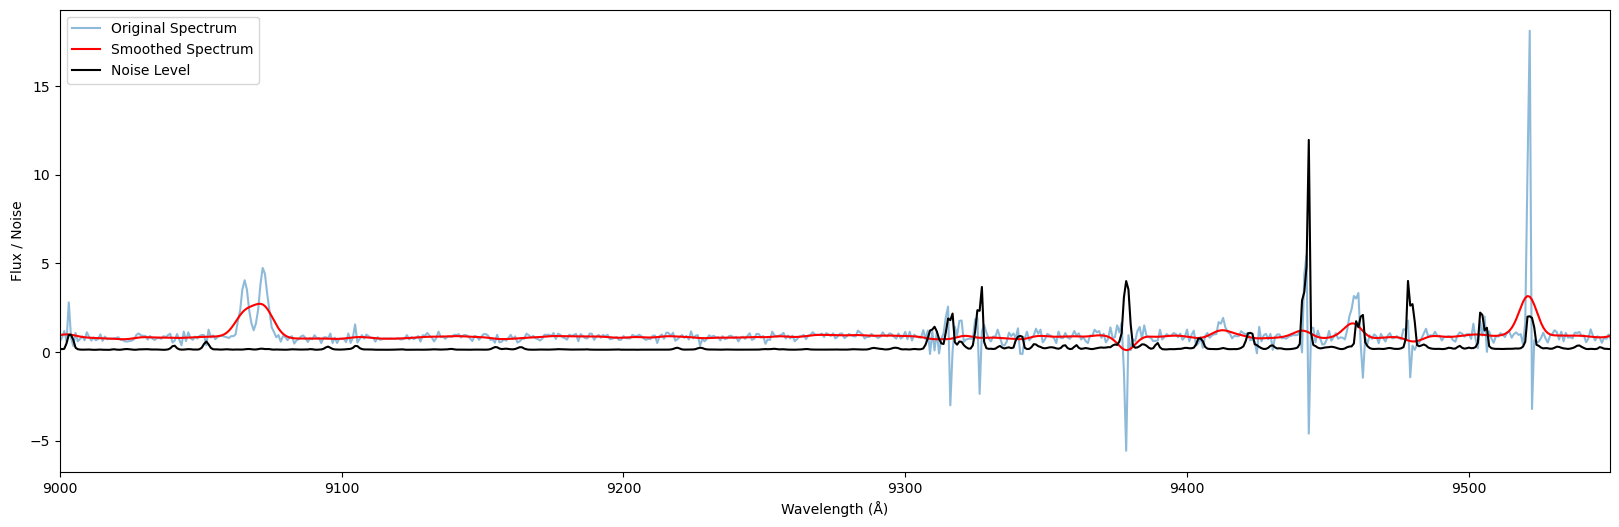

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Compute local noise (handling zeros safely)
local_noise = 1 / np.sqrt(ivar[2896])
local_noise[np.isinf(local_noise)] = np.nan  # Avoid infinities

# Dynamically scale sigma: more smoothing in noisy regions
base_sigma = 1  # Minimum smoothing
scale_factor = 3  # Adjust this for stronger/weaker smoothing
dynamic_sigma = np.clip(base_sigma + (local_noise / np.nanmedian(local_noise)) * scale_factor, 1, 5)

# Apply Gaussian filter with variable sigma
smoothed_flux = gaussian_filter1d(fluxes[2896], sigma=np.nanmean(dynamic_sigma))

# Plot results
plt.figure(figsize=(20, 6))
plt.plot(waves, fluxes[2896], alpha=0.5, label="Original Spectrum")  # Original flux (faint)
plt.plot(waves, smoothed_flux, label="Smoothed Spectrum", color='red')  # Smoothed flux
plt.plot(waves, local_noise, label="Noise Level", color='black')  # Visualizing noise
plt.xlim(9000, 9550)
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux / Noise")
plt.legend()
plt.show()


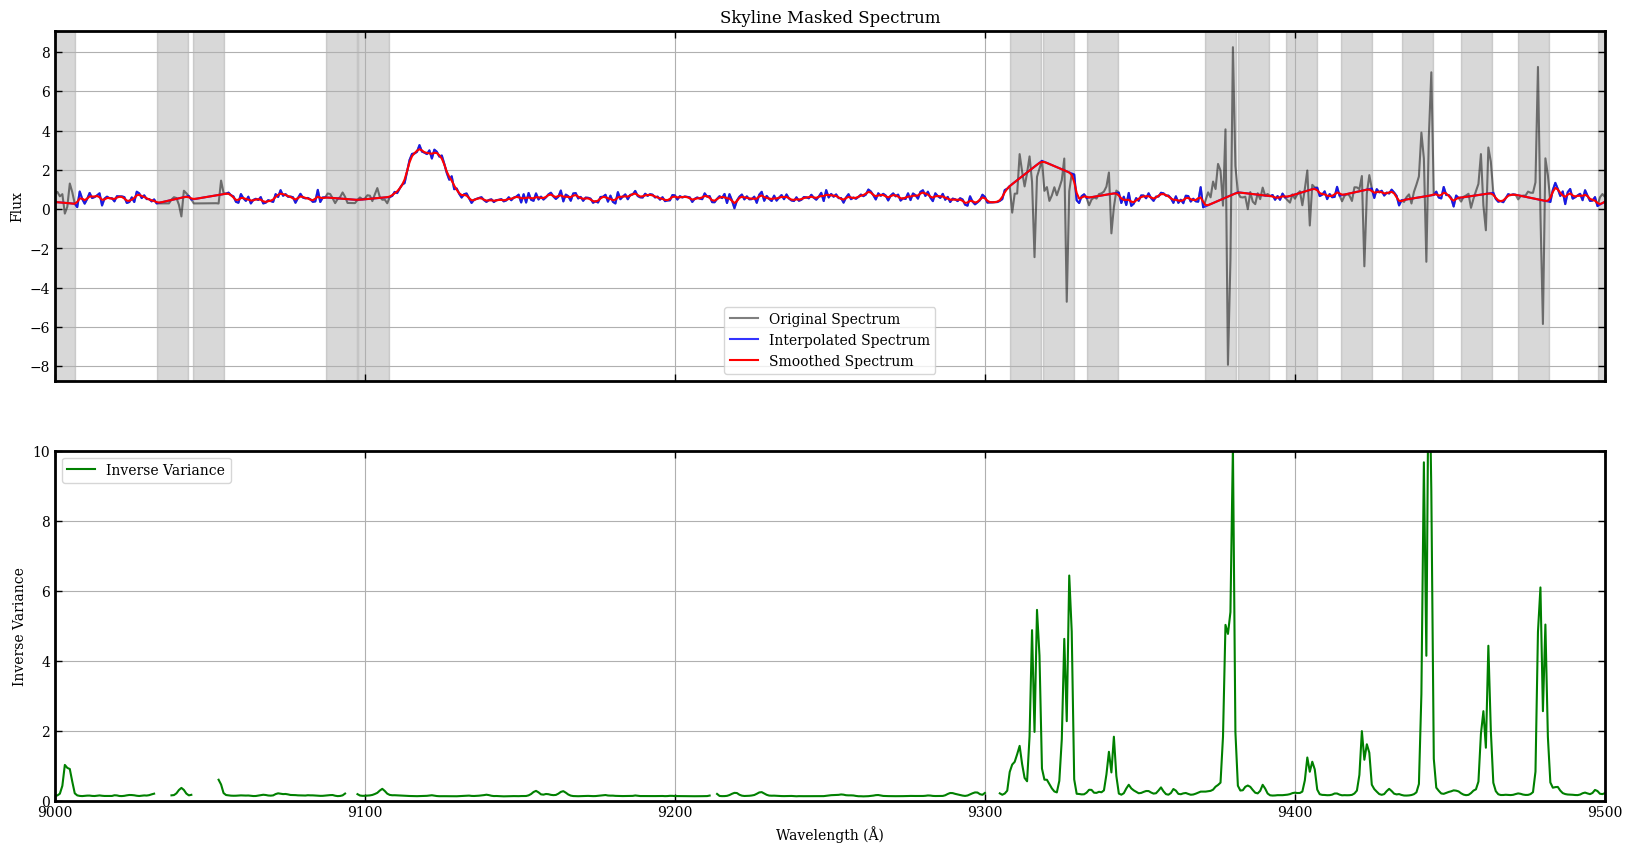

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d

rest_skyline_wavelengths = np.array([
    # Your custom list of skylines
    4358.34,   # Skyline
    5577.338,  # Skyline
    6300.304,  # Skyline
    6863.955,  # Skyline
    6923.220,  # Skyline
    7276.405,  # Skyline
    7316.282,  # Skyline
    7340.885,  # Skyline
    7392.198,  # Skyline
    7586.093,  # Skyline
    7750.640,  # Skyline
    7759.996,  # Skyline
    7794.112,  # Skyline
    7808.467,  # Skyline
    7821.503,  # Skyline
    7841.266,  # Skyline
    7853.488,  # Skyline
    7860.658,  # Skyline
    7870.730,  # Skyline
    7889.851,  # Skyline
    7913.708,  # Skyline
    7921.100,  # Skyline
    7931.542,  # Skyline
    7949.204,  # Skyline
    7964.650,  # Skyline
    7979.768,  # Skyline
    7993.332,  # Skyline
    8014.059,  # Skyline
    8025.800,  # Skyline
    8052.020,  # Skyline
    8062.178,  # Skyline
    8102.489,  # Skyline
    8281.370,  # Skyline
    8288.603,  # Skyline
    8298.896,  # Skyline
    8310.719,  # Skyline
    8344.602,  # Skyline
    8352.850,  # Skyline
    8364.721,  # Skyline
    8382.392,  # Skyline
    8399.170,  # Skyline
    8415.231,  # Skyline
    8430.174,  # Skyline
    8452.250,  # Skyline
    8465.350,  # Skyline
    8493.389,  # Skyline
    8504.830,  # Skyline
    8538.677,  # Skyline
    8548.708,  # Skyline
    8597.384,  # Skyline
    8761.314,  # Skyline
    8767.912,  # Skyline
    8778.333,  # Skyline
    8791.186,  # Skyline
    8827.096,  # Skyline
    8836.334,  # Skyline
    8849.818,  # Skyline
    8867.700,  # Skyline
    8885.850,  # Skyline
    8903.114,  # Skyline
    8919.630,  # Skyline
    8943.395,  # Skyline
    8958.100,  # Skyline
    8988.366,  # Skyline
    9001.346,  # Skyline
    9038.057,  # Skyline
    9049.538,  # Skyline
    9092.563,  # Skyline
    9102.769,  # Skyline
    9313.100,  # Skyline
    9323.728,  # Skyline
    9337.854,  # Skyline
    9375.961,  # Skyline
    9386.708,  # Skyline
    9402.100,  # Skyline
    9419.729,  # Skyline
    9439.650,  # Skyline
    9458.528,  # Skyline
    9476.912,  # Skyline
    9502.815,  # Skyline
    9519.355,  # Skyline
    9552.534,  # Skyline
    9567.340   # Skyline
])


# Define redshift value for the object
z =-1  # Assuming you meant to extract a redshift value here
# Shift skylines to observed wavelengths based on redshift
observed_skyline_wavelengths = rest_skyline_wavelengths

# Define the masking regions for skylines (start and stop values)
skyline_width = 5  # Half-width of 5 Å on each side (10 Å total)
skyline_mask_ranges = np.array([observed_skyline_wavelengths - skyline_width, observed_skyline_wavelengths + skyline_width]).T

# Create a mask excluding skylines
mask = np.ones_like(waves, dtype=bool)
for start, stop in skyline_mask_ranges:
    mask &= ~((waves >= start) & (waves <= stop))

# Apply mask to remove skylines from the flux
masked_waves = waves[mask]
masked_fluxes = fluxes[2896][mask]

# Interpolate over masked regions
interp_func = interp1d(masked_waves, masked_fluxes, kind='linear', fill_value="extrapolate")
interpolated_flux = interp_func(waves)

# Apply Gaussian filter for smoothing
smoothed_flux = gaussian_filter1d(interpolated_flux, sigma=1)

# Plot original vs. masked spectrum
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True)  # Adjusted figsize

# Plot the original and masked spectra
ax1.plot(waves, fluxes[2896], alpha=0.5, label="Original Spectrum", color='black')
ax1.plot(waves, interpolated_flux, alpha=0.8, label="Interpolated Spectrum", color='blue')
ax1.plot(waves, smoothed_flux, label="Smoothed Spectrum", color='red')

# Highlight masked skyline regions
for start, stop in skyline_mask_ranges:
    ax1.axvspan(start, stop, color='gray', alpha=0.3)

ax1.set_ylabel("Flux")
ax1.set_title("Skyline Masked Spectrum")
ax1.set_xlim(9000, 9500)  # Adjusted to include both visible and near-IR skylines
ax1.legend()
ax1.grid(True)

# Subplot for inverse variance
ax2.plot(waves, 1/np.sqrt(ivar[2896]), label='Inverse Variance', color='green')
ax2.set_xlabel("Wavelength (Å)")
ax2.set_ylabel("Inverse Variance")
ax2.set_ylim(0, 10)
ax2.legend()
ax2.grid(True)

plt.show()


In [2]:
QSOFluxProcessor.plot_gaussian_fit_with_subplots(fluxes[2896], 
                                                 waves, 
                                                 1.407318, 
                                                 1.449099, 
                                                 None, 
                                                 26.732571, 
                                                 ivar[2896],
                                                 save_path=None, 
                                                 plot_qso_lines=True, 
                                                 show_plot=True
                                                )


NameError: name 'QSOFluxProcessor' is not defined

In [37]:
elg_fluxes[2896]

1.44598063490074

In [13]:
import numpy as np
import pandas as pd

# Assuming elg_fluxes, results['fitted_redshift'], and results['predicted_redshift'] are numpy arrays or lists
true_values = elg_fluxes
fitted_values = results['Fitted Redshift']
predicted_values = results['Predict Redshift']

# Remove NaN values from fitted and predicted values for analysis
valid_indices = ~np.isnan(fitted_values) & ~np.isnan(predicted_values)
true_values = true_values[valid_indices]
fitted_values = fitted_values[valid_indices]
predicted_values = predicted_values[valid_indices]

# Summary statistics for fitted values
mae_fitted = np.mean(np.abs(fitted_values - true_values))
mse_fitted = np.mean((fitted_values - true_values) ** 2)
rmse_fitted = np.sqrt(mse_fitted)
r_squared_fitted = 1 - (np.sum((fitted_values - true_values) ** 2) / np.sum((true_values - np.mean(true_values)) ** 2))

# Summary statistics for predicted values
mae_predicted = np.mean(np.abs(predicted_values - true_values))
mse_predicted = np.mean((predicted_values - true_values) ** 2)
rmse_predicted = np.sqrt(mse_predicted)
r_squared_predicted = 1 - (np.sum((predicted_values - true_values) ** 2) / np.sum((true_values - np.mean(true_values)) ** 2))

# Fraction of outliers for both fitted and predicted values (considering an outlier as outside ±0.1 of true value)
tolerance = 0.1
outliers_fitted = np.sum(np.abs(fitted_values - true_values) > tolerance)
fraction_outliers_fitted = outliers_fitted / len(true_values)

outliers_predicted = np.sum(np.abs(predicted_values - true_values) > tolerance)
fraction_outliers_predicted = outliers_predicted / len(true_values)

# Summary statistics
summary_stats = {
    'Fitted Redshift': {
        'MAE': mae_fitted,
        'MSE': mse_fitted,
        'RMSE': rmse_fitted,
        'R²': r_squared_fitted,
        'Fraction of Outliers': fraction_outliers_fitted
    },
    'Predicted Redshift': {
        'MAE': mae_predicted,
        'MSE': mse_predicted,
        'RMSE': rmse_predicted,
        'R²': r_squared_predicted,
        'Fraction of Outliers': fraction_outliers_predicted
    }
}

# Convert to DataFrame for better visualization
summary_df = pd.DataFrame(summary_stats)

print(summary_df)


KeyError: 'Predict Redshift'

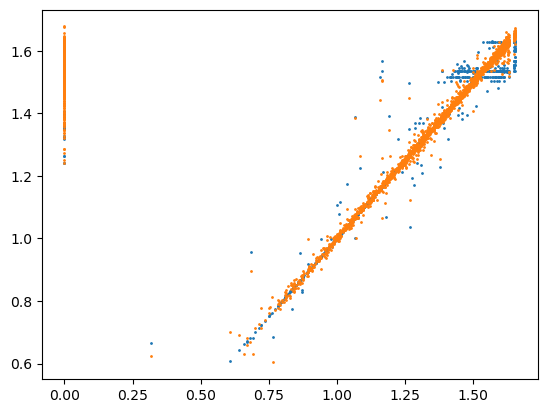

In [18]:
import matplotlib.pyplot as plt
plt.scatter(true_values, fitted_values, 1)
plt.scatter(true_values, predicted_values, 1)